In [43]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [6]:
#read data
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Visualizations

[Text(0, 0.5, 'Median Value of Owner-Occupied Homes')]

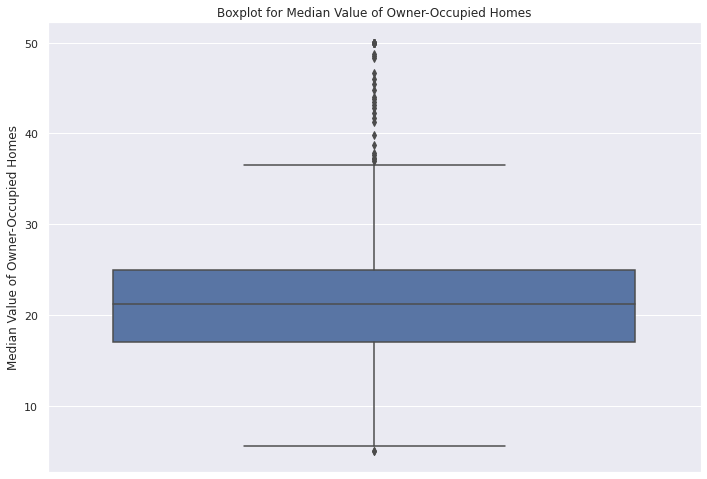

In [32]:
#For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title('Boxplot for Median Value of Owner-Occupied Homes')
ax.set(ylabel='Median Value of Owner-Occupied Homes')

#### The above boxplot shows minimum, first quantile, median, third quantile, maximum, as well as outliers for the variable Medican Value of Owner-Occupied Homes.

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


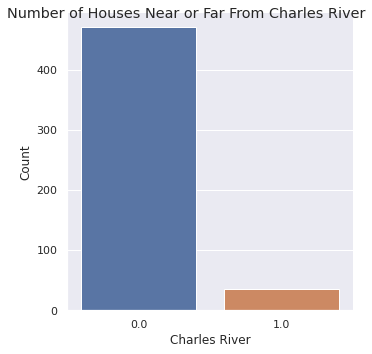

In [51]:
#Provide a  bar plot for the Charles river variable
#sns.set(style="whitegrid")
ax = sns.catplot("CHAS", kind = 'count', data=boston_df)
ax.fig.suptitle('Number of Houses Near or Far From Charles River')
ax.set(xlabel='Charles River', ylabel='Count')

####  The above bar plot shows that the number of houses near Charles River is way less than the number of houses far from Charles River.

[Text(0.5, 0, 'Age Group'),
 Text(0, 0.5, 'Median Value of Owner-Occupied Homes')]

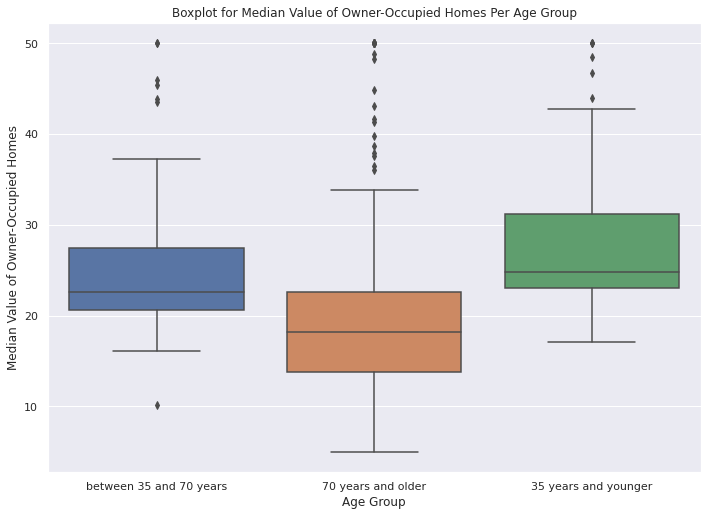

In [33]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable 
#into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'


#bins = [2, 35, 70, 120]
#labels = ['<35', '35-70', '70+']
#boston_df['age_group'] = pd.cut(boston_df['AGE'], bins, labels = labels,include_lowest = True)

ax = sns.boxplot(x = 'age_group', y='MEDV', data=boston_df)
ax.set_title('Boxplot for Median Value of Owner-Occupied Homes Per Age Group')
sns.set(rc={'figure.figsize':(18,12)})
ax.set(xlabel='Age Group', ylabel='Median Value of Owner-Occupied Homes')

#### The above box plots show that for people who aged 35 years and younger has the highest median value of owner-occupied homes, while for people who aged 70 years and older has the lowest median value of owner-occupied homes. In other words, the median value of owner-occuplied homes is higher when age is lower.

[Text(0.5, 0, 'proportion of non-retail business acres per town'),
 Text(0, 0.5, 'Nitric oxide concentrations')]

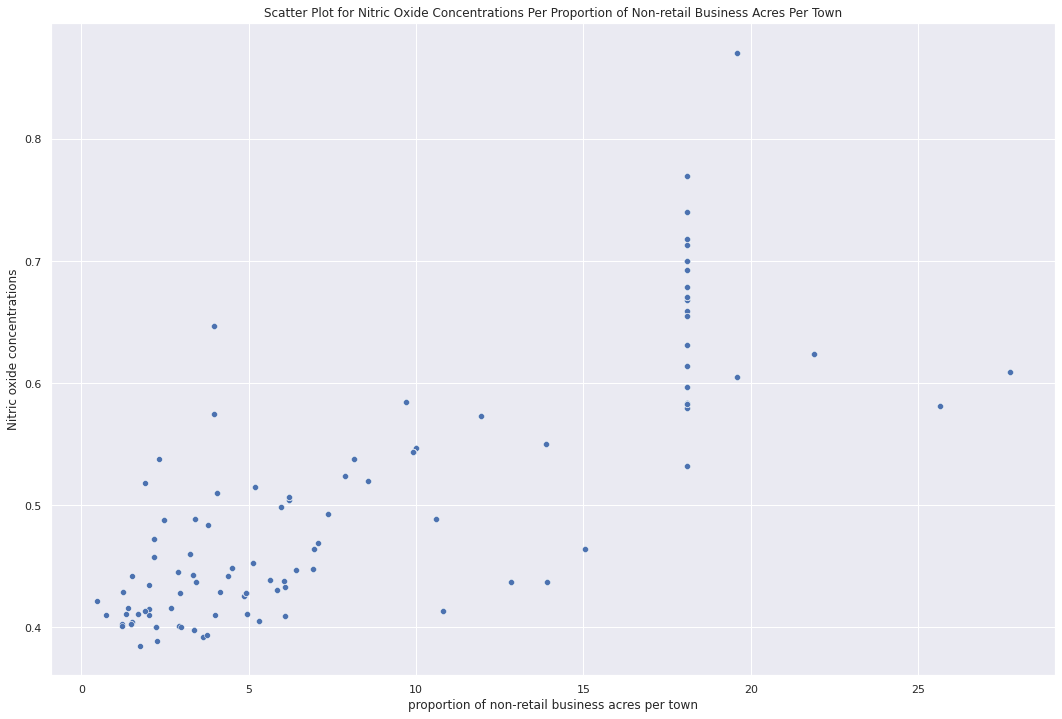

In [34]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and 
#the proportion of non-retail business acres per town. What can you say about the relationship?
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set_title('Scatter Plot for Nitric Oxide Concentrations Per Proportion of Non-retail Business Acres Per Town')
ax.set(xlabel='proportion of non-retail business acres per town', ylabel='Nitric oxide concentrations')

#### The above scatter plot shows that the nitric oxide concentrations is positively correlated with the proportion of non-retail business acres per town. The higher nitric oxide concentration, the higher proportion of non-retail business acres per town.

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Pupil-Teacher Ratio'), Text(0, 0.5, 'Counts')]

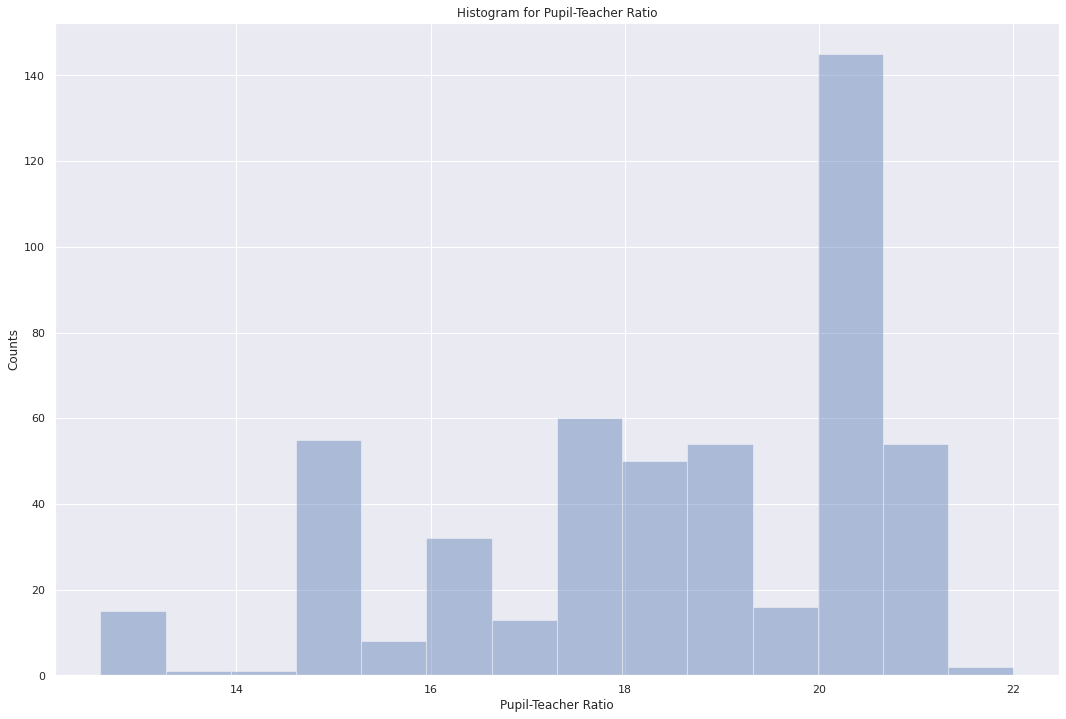

In [52]:
#Create a histogram for the pupil to teacher ratio variable
ax = sns.distplot(x = boston_df['PTRATIO'], kde = False)
ax.set_title('Histogram for Pupil-Teacher Ratio')
ax.set(xlabel='Pupil-Teacher Ratio', ylabel = 'Counts')

#### The above histogram of pupil-teacher ratio is left-skewed, with a longer tail to the left.

# Statistical Testing and Analysis

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)
Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)


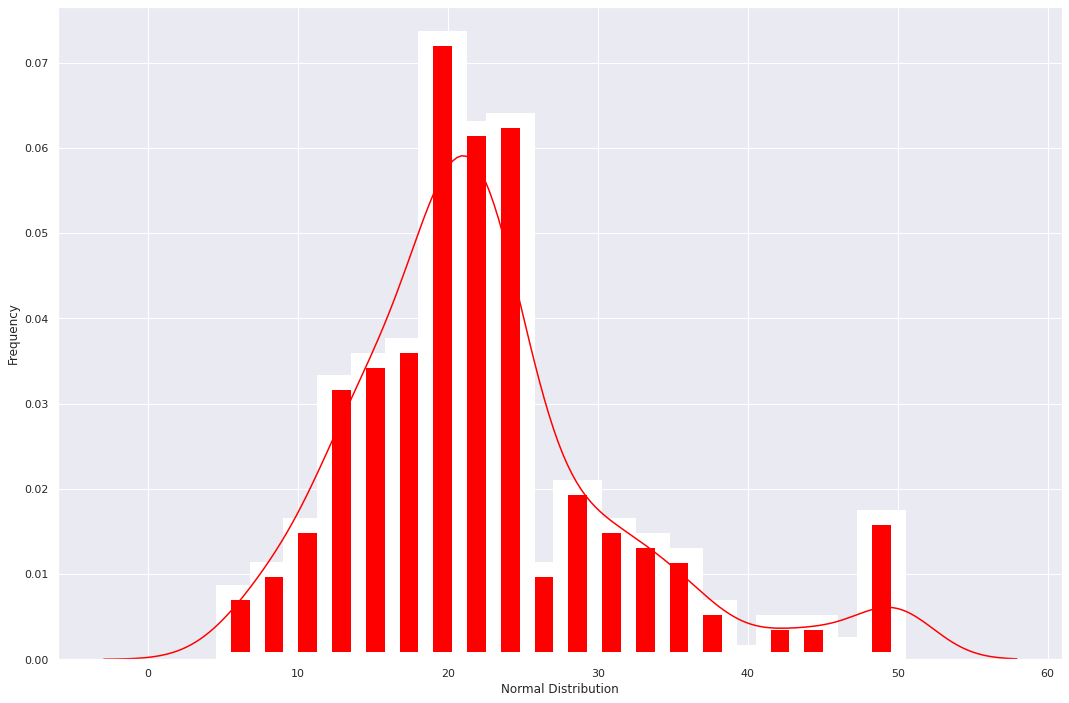

In [45]:
#Is there a significant difference in median value of houses 
#bounded by the Charles river or not? (T-test for independent samples)

#Checking Assumptions
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
## we can assume it is normal

print(scipy.stats.levene(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0.0]['MEDV'], center='mean'))

# since the p-value is less than 0.05, the equality of variance assumption is violated, for the purpose of
# answering the question, we will move along to the t-test


#t-test
print(scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0.0]['MEDV'], equal_var = True))

#### Hypothesis:
*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses between bounded by the Charles river or not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses between bounded by the Charles river or not")

#### Conclusion: 
Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses based on whether the houses are bounded by the Charles river or not.

In [47]:
#Is there a difference in Median values of houses (MEDV) for 
#each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#check assumption
print(scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                         boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                         boston_df[boston_df['age_group'] == '70 years and older']['MEDV'],
                         center='mean'))
# since the p-value is greater than 0.05, we can assume equality of variance

#Group
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

#One-way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic, p_value))

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)
F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### Hypothesis:
*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

#### Conclusion: 
Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ. There is a statistical significant difference in median values of houses for at least one of the age groups.

(0.7636514469209151, 7.913361061238693e-98)


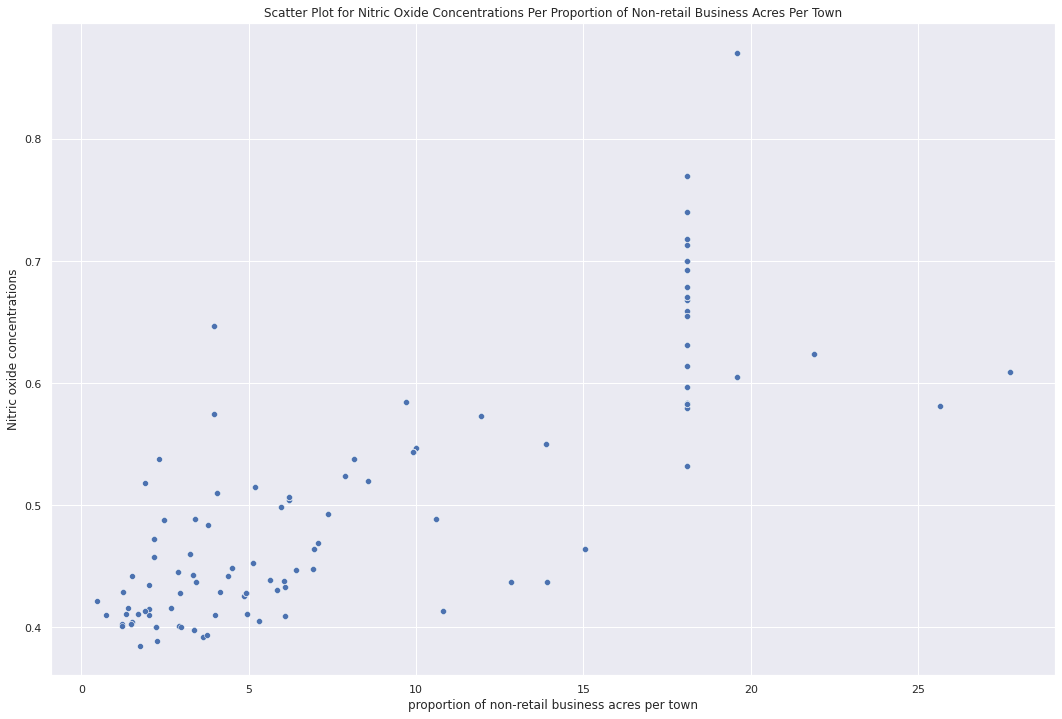

In [53]:
#Can we conclude that there is no relationship between Nitric oxide concentrations 
#and proportion of non-retail business acres per town? (Pearson Correlation)

#Scatter Plot
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set_title('Scatter Plot for Nitric Oxide Concentrations Per Proportion of Non-retail Business Acres Per Town')
ax.set(xlabel='proportion of non-retail business acres per town', ylabel='Nitric oxide concentrations')

print(scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX']))

#### Hypothesis:
*   $H\_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

#### Conclusion: 
Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [50]:
#What is the impact of an additional weighted distance to the five Boston employment centres 
#on the median value of owner occupied homes? (Regression analysis)
X = boston_df['DIS']
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           1.21e-08
Time:                        20:53:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Hypothesis:
*   $H\_0: β1$ = 0 (weighted distance to the five Boston employment centres has no effect on the median value of owner occupied homes)
*   $H\_1: β1$ is not equal to 0 (weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes)

#### Conclusion: 
Since the p-value is less than 0.05, we reject the null hypothesis and conclude that weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes. If the weighted distance to the five Boston employment centres increases by 1 unit, the median value of owner occupied homes increases by 1.0916 units.